## Edge detection techniques

In [23]:
#importing libraries
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt 

#read image from folder
#matplotlib.pyplot.imread(path): loads image inside variable from specified path
image = plt.imread('preprocessing_dataset/im2.jpeg')

#convert the RBG image to binary for easy processing
#cvtColor(src,code): convert an image specified in src from one color space to another according to code
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#denoise the image with Gaussian filter
#GaussianBlur(src, kernel_size, std): reduces high-frequency pixels from src image according to kernel_size
img_gaussian = cv2.GaussianBlur(gray_image,(3,3),0)

### Gradient based techniques

#### Robert Operator

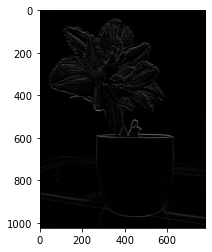

In [24]:
#prepare the x(horizontal) and y(vertical) kernerl matrices
kernelRobertx = np.array([[1,0],[0,-1]])
kernelRoberty = np.array([[0,1],[-1,0]])

#apply x kernel
#filter2D(src,depth, kernel): the src image undergoes filtering and resulting image has depth accordingly specified
img_robertx = cv2.filter2D(img_gaussian, -1, kernelRobertx)

#apply y kernel
img_roberty = cv2.filter2D(img_gaussian, -1, kernelRoberty)

img_robert = img_robertx + img_roberty

#plot the filtered image
plt.imshow(img_robert, cmap='gray')

#### Prewitt Operator

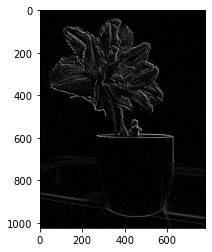

In [25]:
#prepare the x(horizontal) and y(vertical) kernerl matrices
kernelPrewittx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernelPrewitty = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])

#apply x kernel
img_prewittx = cv2.filter2D(img_gaussian, -1, kernelPrewittx)

#apply y kernel
img_prewitty = cv2.filter2D(img_gaussian, -1, kernelPrewitty)

img_prewitt = img_prewittx + img_prewitty

#plot the filtered image
plt.imshow(img_prewitt, cmap='gray')

#### Sobel Operator

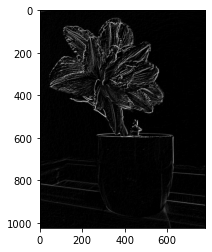

In [30]:
#apply x kernel
img_sobelx = cv2.Sobel(img_gaussian,cv2.CV_8U,1,0,ksize=3)

#apply y kernel
img_sobely = cv2.Sobel(img_gaussian,cv2.CV_8U,0,1,ksize=3)

img_sobel = img_sobelx + img_sobely

#plot the filtered image
plt.imshow(img_sobel, cmap='gray')

### Gaussian Based Techniques

#### Canny Operator

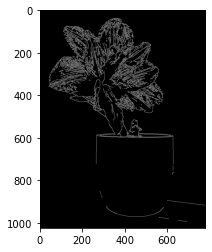

In [31]:
img_canny = cv2.Canny(image,100,150)

#plot the filtered image
plt.imshow(img_canny, cmap='gray')

#### Laplacian of Gaussian Operator

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


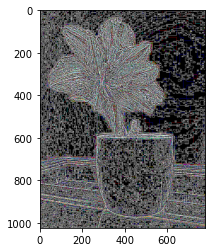

In [32]:
img_laplacian = cv2.Laplacian(image,cv2.CV_64F)

#plot the filtered image
plt.imshow(img_laplacian, cmap='gray')

### Comparison of all the techniques at once

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 777.5, 1023.5, -0.5)

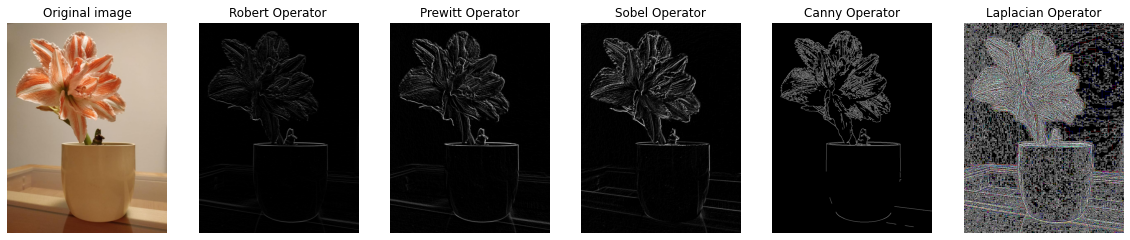

In [33]:
fig=plt.figure(figsize=(20, 10))
columns = 6
rows = 5

fig.add_subplot(1, 6, 1)
plt.imshow(image)
plt.title('Original image')
plt.axis('off')

fig.add_subplot(1, 6, 2)
plt.imshow(img_robert, cmap='gray')
plt.title('Robert Operator')
plt.axis('off')

fig.add_subplot(1, 6, 3)
plt.imshow(img_prewitt, cmap='gray')
plt.title('Prewitt Operator')
plt.axis('off')

fig.add_subplot(1, 6, 4)
plt.imshow(img_sobel, cmap='gray')
plt.title('Sobel Operator')
plt.axis('off')

fig.add_subplot(1, 6, 5)
plt.imshow(img_canny, cmap='gray')
plt.title('Canny Operator')
plt.axis('off')

fig.add_subplot(1, 6, 6)
plt.imshow(img_laplacian, cmap='gray')
plt.title('Laplacian Operator')
plt.axis('off')
